# Africa Conflict Model Prediction Analysis

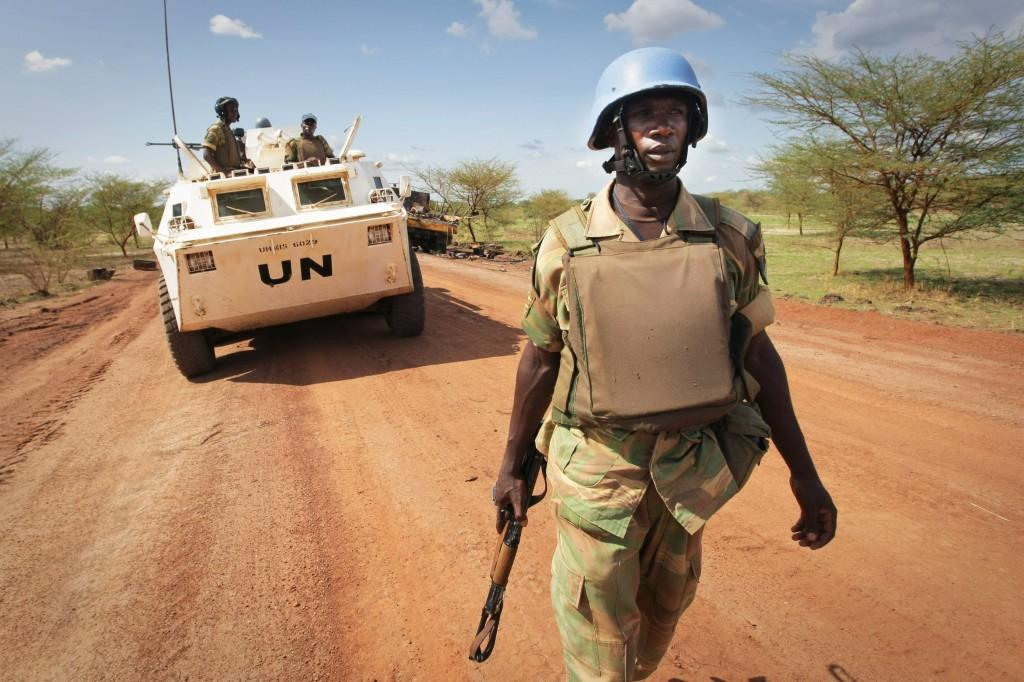

# Background 
Since the 1990s, conflicts in Africa have evolved from civil wars, such as in Rwanda and Liberia, to insurgencies driven by groups like Boko Haram and Al-Shabaab. Communal violence, political unrest, and terrorism have further destabilized regions, with ethnic tensions and resource competition fueling conflicts in places like South Sudan, Ethiopia, and the Sahel. These conflicts have shifted towards asymmetric warfare, targeting civilians, and expanding across borders. A conflict predictor using ACLED data would help governments, security agencies, and humanitarian organizations anticipate violence, allocate resources effectively, and design informed peacebuilding strategies, enabling proactive intervention and crisis prevention.

**Objective:**
Develop a prediction model to analyze political violence and predict future events, trends, and fatality risks in Africa based on historical data.

**Questions a successful model could answer**:

1) Where are future political violence events likely to occur?

*Predict regions/countries most prone to future incidents.*

2) Which events are likely to have the highest fatality rates?

*Forecast event types with high mortality, enabling early interventions.*

3) What are the most frequent sub-event types linked to disorder types?

*Identify patterns linking specific sub-event types to disorder outcomes.*

4) Which actors are most involved in escalating violence?

*Highlight key actors contributing to increased violent activities over time.*

5) How do geographic and temporal trends correlate with event severity?


The success of this model could help;


*   Analyze the impact of location and time on event escalation and fatalities.
*   This model could inform government agencies and humanitarian organizations for strategic planning and conflict prevention.




In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Load the csv dataset
conflict_df = pd.read_csv("/content/Africa_1997-2024_Aug23.csv")

# Print the first 5 rows
print(conflict_df.head())

# Check datatypes and missing values

print(conflict_df.info())

  event_id_cnty  event_date  year  time_precision       disorder_type  \
0       ANG4104  2024-08-23  2024               1  Political violence   
1      BFO12464  2024-08-23  2024               1  Political violence   
2      BFO12471  2024-08-23  2024               1  Political violence   
3      BFO12472  2024-08-23  2024               1  Political violence   
4      CAO14533  2024-08-23  2024               1  Political violence   

  event_type sub_event_type  \
0      Riots   Mob violence   
1    Battles    Armed clash   
2    Battles    Armed clash   
3    Battles    Armed clash   
4    Battles    Armed clash   

                                              actor1  \
0                                   Rioters (Angola)   
1       JNIM: Group for Support of Islam and Muslims   
2       JNIM: Group for Support of Islam and Muslims   
3       JNIM: Group for Support of Islam and Muslims   
4  Islamic State (West Africa) and/or Boko Haram ...   

              assoc_actor_1  inter1  

In [23]:
conflict_df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ANG4104,2024-08-23,2024,1,Political violence,Riots,Mob violence,Rioters (Angola),Vigilante Group (Angola),5,...,Luanda,-8.8383,13.2344,1,Ango Noticias; Correio da Kianda; Novo Journal,National,"On 23 August 2024, a mob assaulted a police of...",1,crowd size=no report,1724714023
1,BFO12464,2024-08-23,2024,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,2,...,Niempourou,12.6018,-3.2158,2,Signal,New media,"On 23 August 2024, JNIM ambushed a patrol of s...",0,NaN,1724714023
2,BFO12471,2024-08-23,2024,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,2,...,Djibo,14.0875,-1.6418,1,Al Zallaqa,New media,"On 23 August 2024, JNIM claimed to have killed...",3,NaN,1724714023
3,BFO12472,2024-08-23,2024,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,2,...,Diougo,11.2472,0.1221,1,Facebook; Whatsapp,New media,"On 23 August 2024, JNIM militants attacked vol...",10,NaN,1724714023
4,CAO14533,2024-08-23,2024,1,Political violence,Battles,Armed clash,Islamic State (West Africa) and/or Boko Haram ...,NaN,2,...,Moskota,10.9508,13.8671,2,Humanity Purpose,New media,"On 23 August 2024, ISWAP or Boko Haram militan...",0,NaN,1724714031


### ACLED Dataset Overview

The ACLED (Armed Conflict Location & Event Data) dataset above provides detailed information on conflict events, including the following key columns:

- **Event ID**: Unique identifier for each event.
- **Event Date**: Date when the event occurred.
- **Event Type**: Category of the event (e.g., battles, protests, riots, explosions).
- **Sub-event Type**: Detailed description of the event type (e.g., armed clashes, peaceful protests).
- **Actor 1**: Primary actor involved (e.g., government forces, rebel groups).
- **Actor 2**: Opposing or secondary actor (if applicable).
- **Inter1 & Inter2**: Codes representing actor types (e.g., state forces, civilians).
- **Country**: Country where the event took place.
- **Region**: Geographic region (e.g., East Africa, Southern Africa).
- **Location**: Specific city or area where the event occurred.
- **Latitude & Longitude**: Coordinates for mapping the event.
- **Fatalities**: Number of deaths reported due to the event.

This dataset allows for detailed analysis of conflict dynamics across geographic regions.


# Explore the data set and Handle missing values

In [24]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset Shape: {conflict_df.shape}")

# Check for missing values
print("Missing values in each column:\n", conflict_df.isnull().sum())

# Statistical summary for numerical columns
print(conflict_df.describe())

# Statistical summary for categorical columns
print(conflict_df.describe(include=['object']))


Dataset Shape: (381997, 31)
Missing values in each column:
 event_id_cnty              0
event_date                 0
year                       0
time_precision             0
disorder_type              0
event_type                 0
sub_event_type             0
actor1                     0
assoc_actor_1         278528
inter1                     0
actor2                104245
assoc_actor_2         305889
inter2                     0
interaction                0
civilian_targeting    268378
iso                        0
region                     0
country                    0
admin1                    12
admin2                  3543
admin3                190657
location                   0
latitude                   0
longitude                  0
geo_precision              0
source                     0
source_scale               0
notes                      0
fatalities                 0
tags                  296271
timestamp                  0
dtype: int64
                year  time_p

<Axes: >

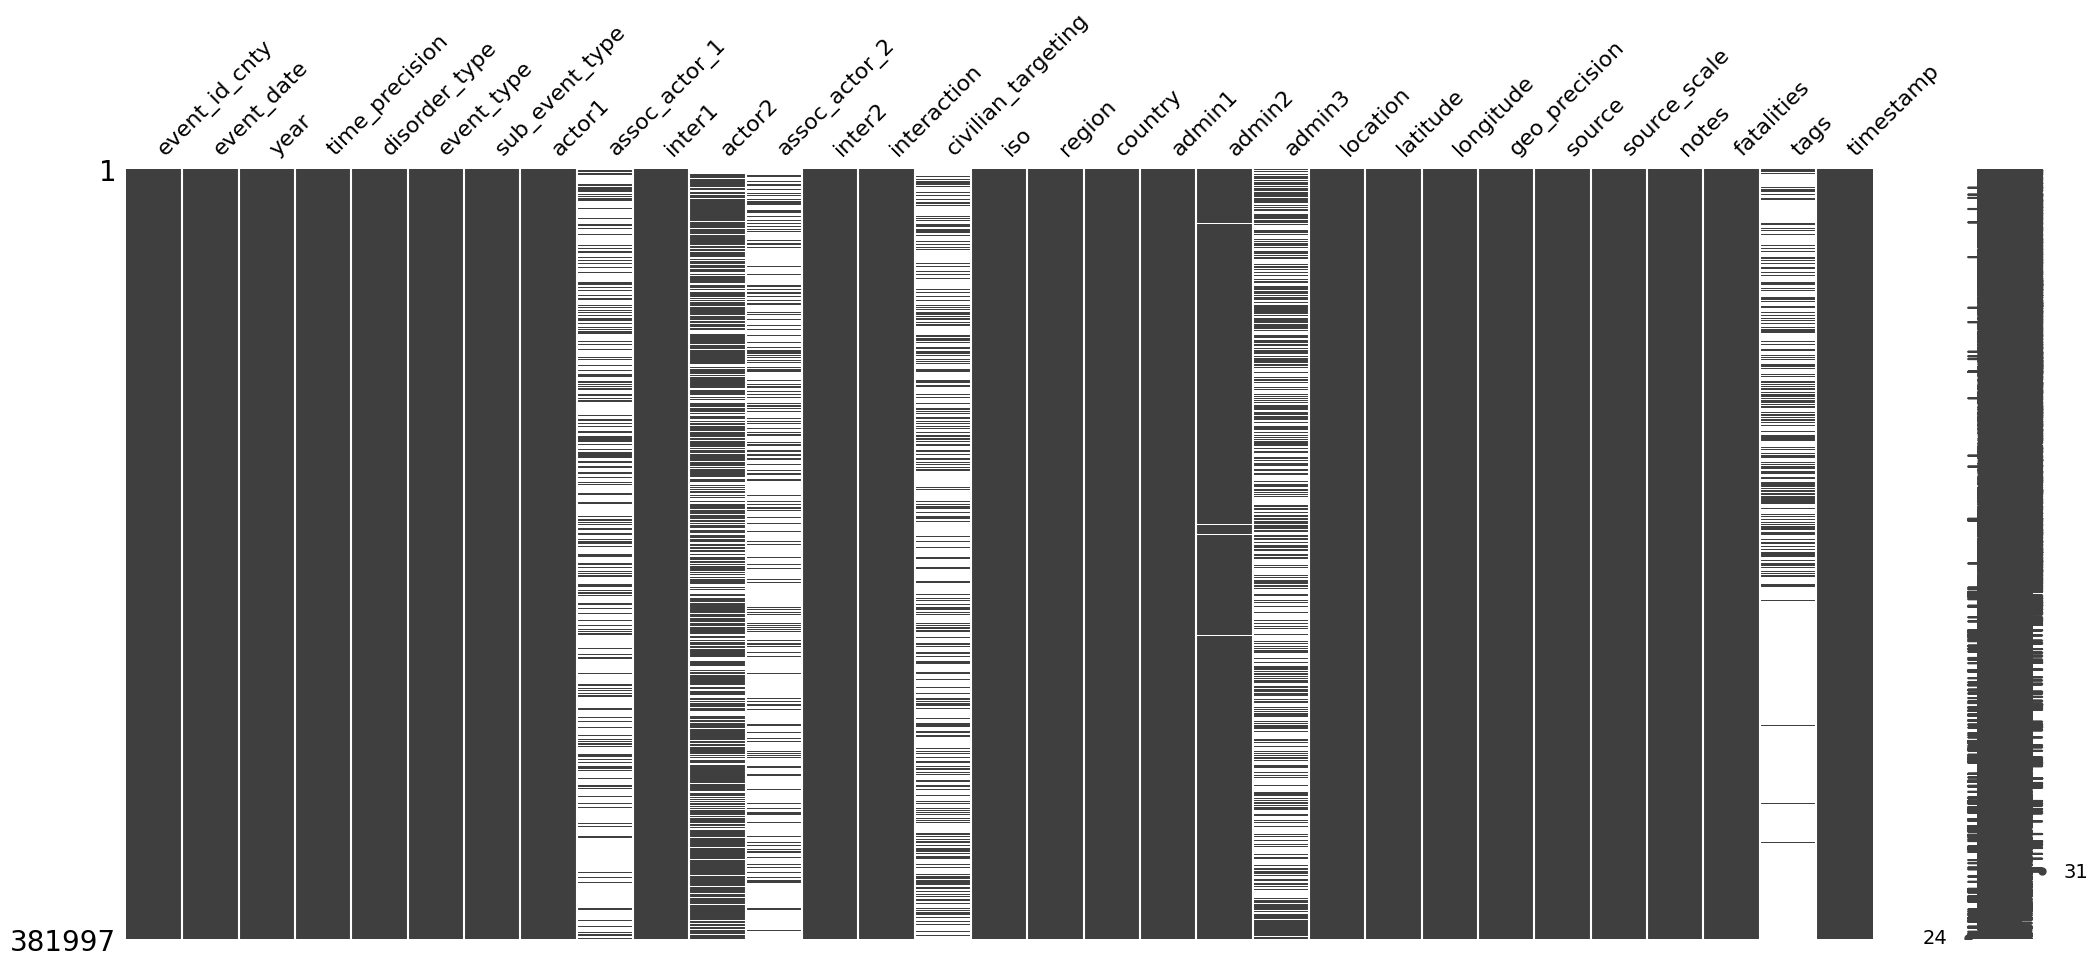

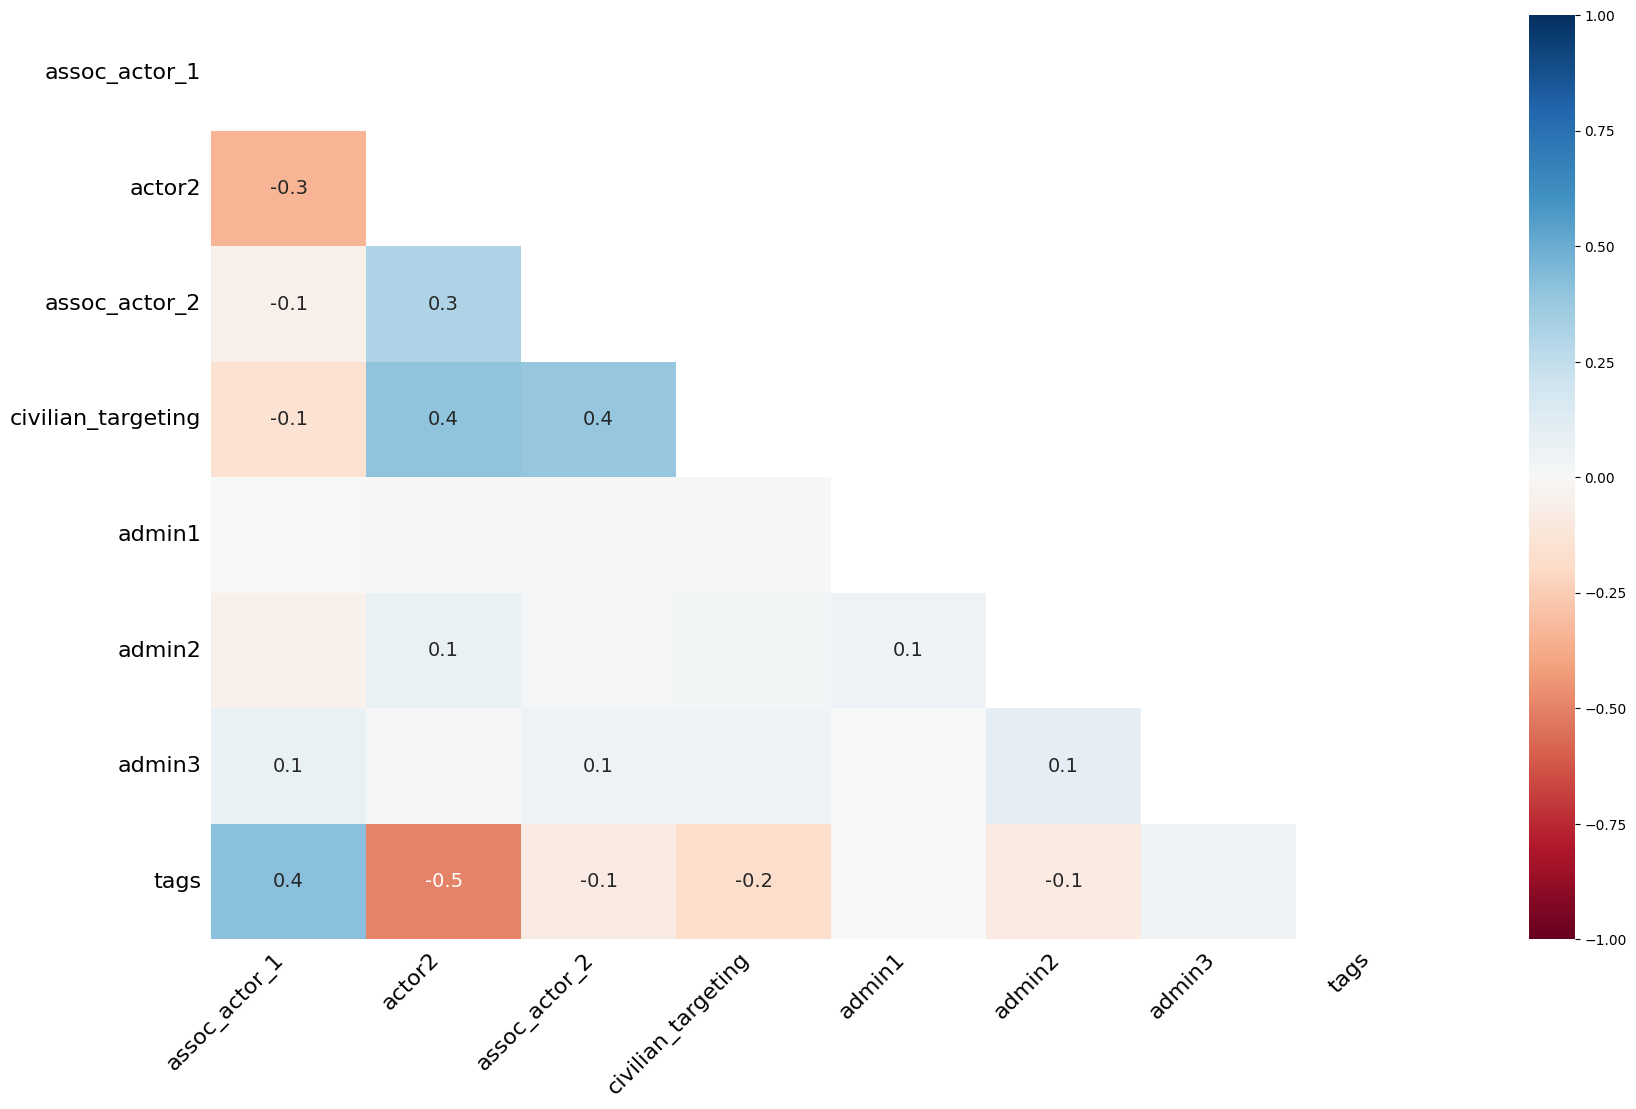

In [25]:
# Visualize missing data
import missingno as msno

# Matrix of missing values
msno.matrix(conflict_df)

# Heatmap to see the correlation of missing values
msno.heatmap(conflict_df)


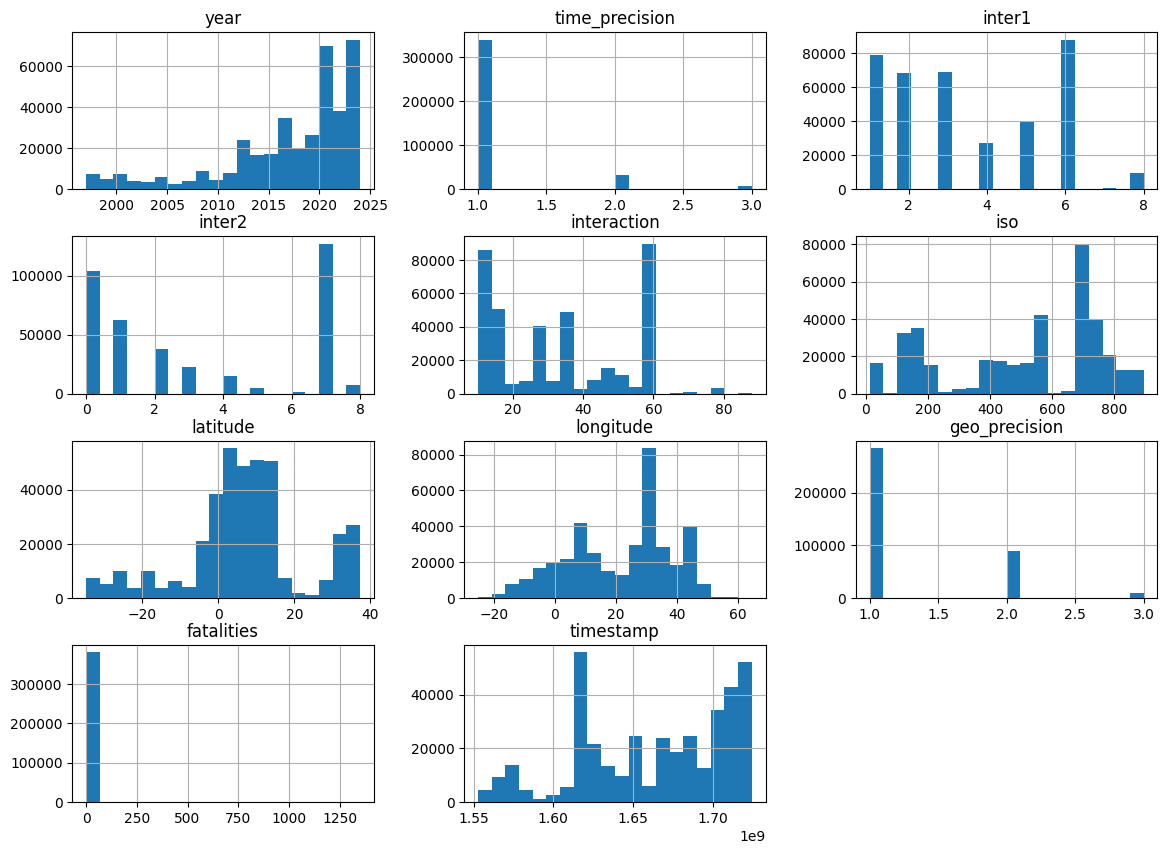

<ipython-input-26-832643741e1e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(conflict_df['fatalities'], shade=True)


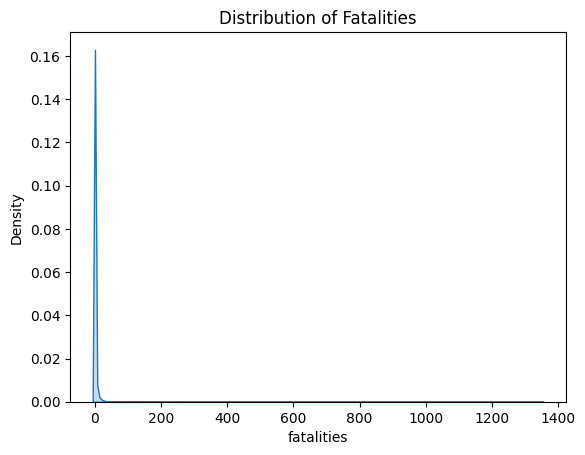

In [26]:
# Distribution of numerical variables
conflict_df.hist(bins=20, figsize=(14,10))
plt.show()

# Kernel Density Estimation (KDE) for continuous variables like fatalities
sns.kdeplot(conflict_df['fatalities'], shade=True)
plt.title('Distribution of Fatalities')
plt.show()


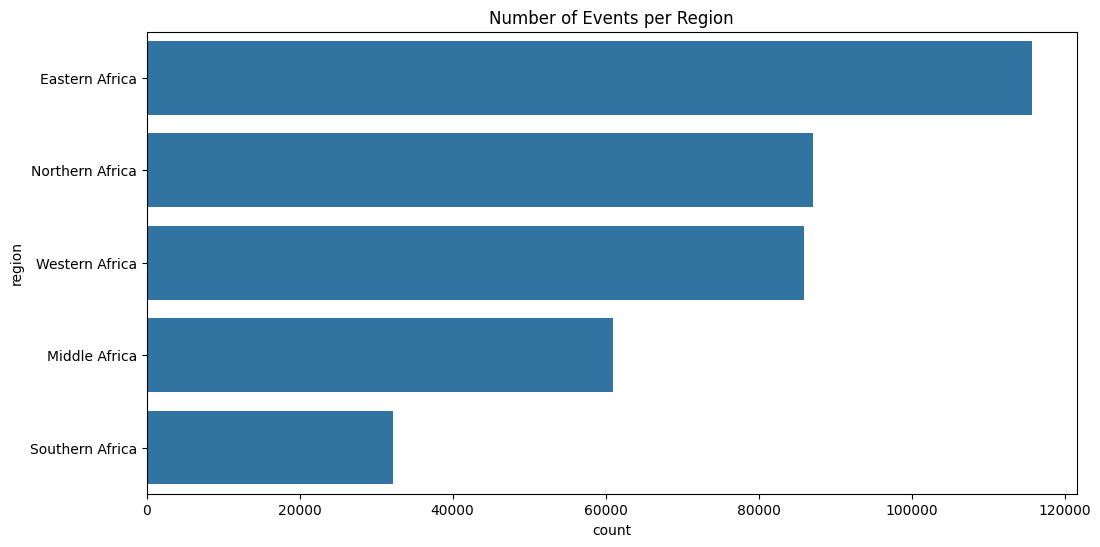

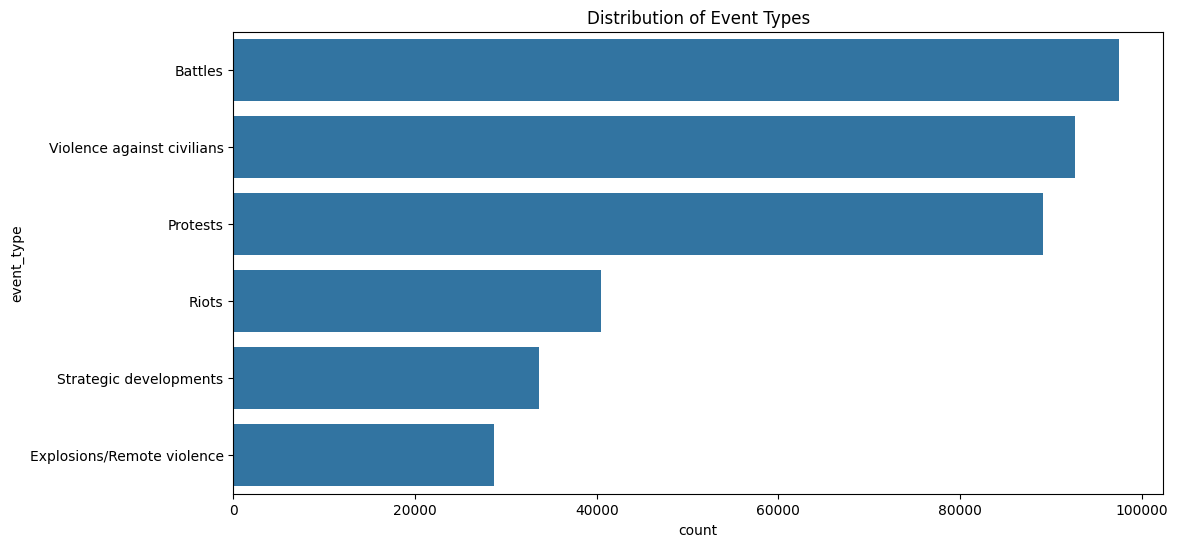

disorder_type
Political violence                    236527
Demonstrations                        109323
Strategic developments                 33642
Political violence; Demonstrations      2505
Name: count, dtype: int64
actor1
Al Shabaab                            15787
Protesters (South Africa)             11177
Protesters (Morocco)                  10606
Protesters (Algeria)                   8359
Rioters (South Africa)                 8128
                                      ...  
Dutse Communal Militia (Nigeria)          1
Unidentified Clan Militia (Gambia)        1
Moundang Ethnic Militia (Chad)            1
Akpakanme Communal Militia (Benin)        1
BAT: Boere Attack Troop                   1
Name: count, Length: 5828, dtype: int64


In [27]:
# Count plot for regions and event types
plt.figure(figsize=(12,6))
sns.countplot(y="region", data=conflict_df, order=conflict_df['region'].value_counts().index)
plt.title('Number of Events per Region')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(y="event_type", data=conflict_df, order=conflict_df['event_type'].value_counts().index)
plt.title('Distribution of Event Types')
plt.show()

# Checking the unique values of categorical variables
print(conflict_df['disorder_type'].value_counts())
print(conflict_df['actor1'].value_counts())


# Insights
The bar chart shows regional disparities in the number of events across Africa. Eastern Africa has the highest count, nearing 120,000, indicating the most activity, followed by Western and Northern Africa with around 80,000 events each. Middle Africa shows moderate activity with just over 60,000 events, while Southern Africa has the lowest at approximately 40,000. This suggests Eastern Africa requires more focus, while Southern Africa might be under-represented or less active.

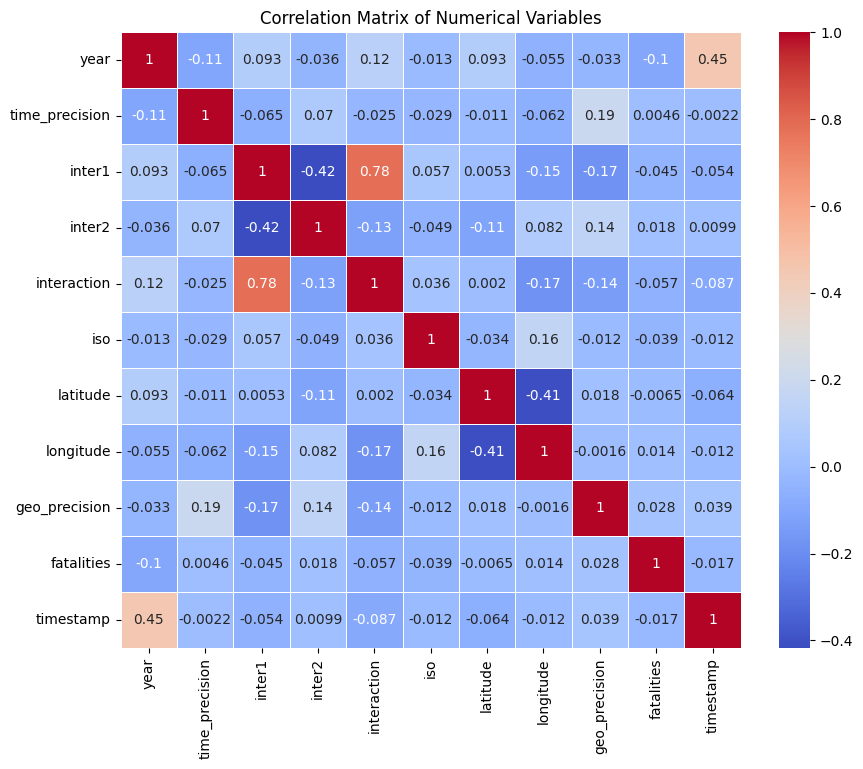

In [28]:
# Correlation matrix
corr_matrix = conflict_df.select_dtypes(include=['number']).corr()

# Heatmap for visualization
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Exploring the relationship between the variables

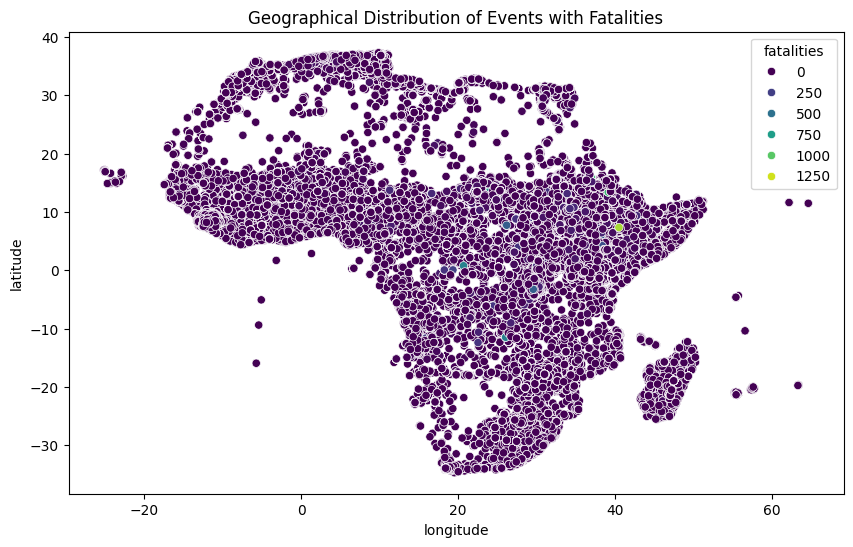

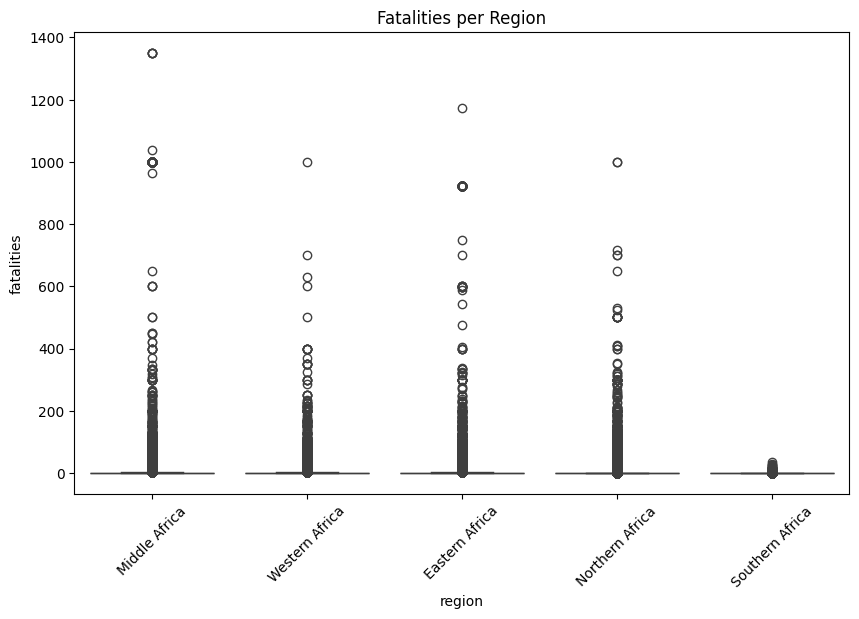

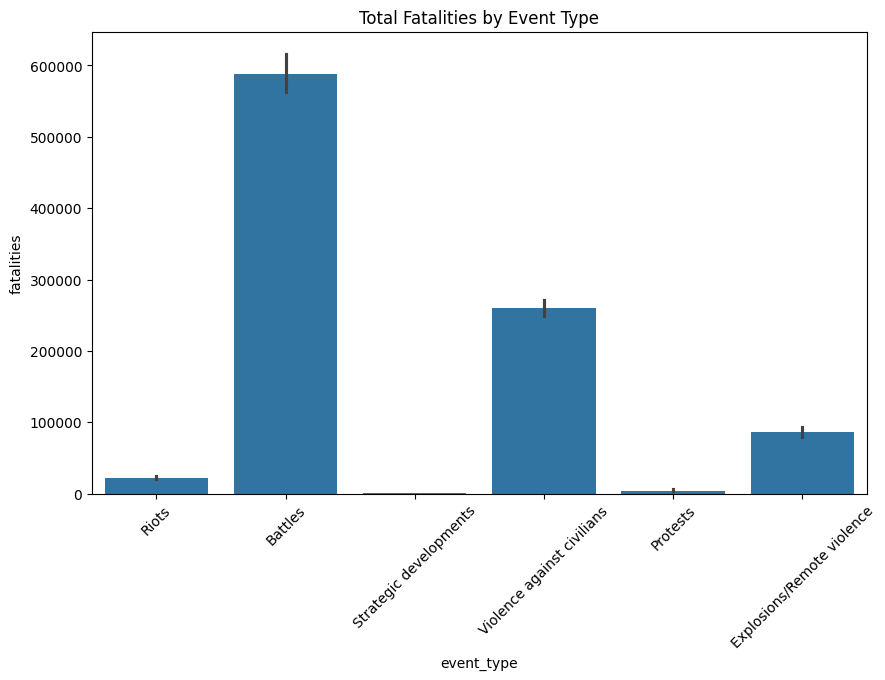

In [29]:
# Scatter plot between location (latitude, longitude) and fatalities
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='fatalities', data=conflict_df, palette='viridis')
plt.title('Geographical Distribution of Events with Fatalities')
plt.show()

# Boxplot to show the spread of fatalities across regions
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='fatalities', data=conflict_df)
plt.title('Fatalities per Region')
plt.xticks(rotation=45)
plt.show()

# Barplot of event type vs fatalities
plt.figure(figsize=(10,6))
sns.barplot(x='event_type', y='fatalities', data=conflict_df, estimator=sum)
plt.title('Total Fatalities by Event Type')
plt.xticks(rotation=45)
plt.show()


# Insights
The analysis highlights that **battles** are the leading cause of fatalities in conflict events, contributing to over 600,000 deaths, followed by **violence against civilians** and **explosions/remote violence**, which also have significant fatality counts. In contrast, **riots**, **protests**, and **strategic developments** lead to minimal deaths. Geographically, conflict events are widespread across Africa, with dense concentrations in regions with higher fatality counts. These findings suggest that armed battles and civilian-targeted violence are the primary drivers of loss of life, emphasizing the need for targeted interventions to reduce such high-fatality events.

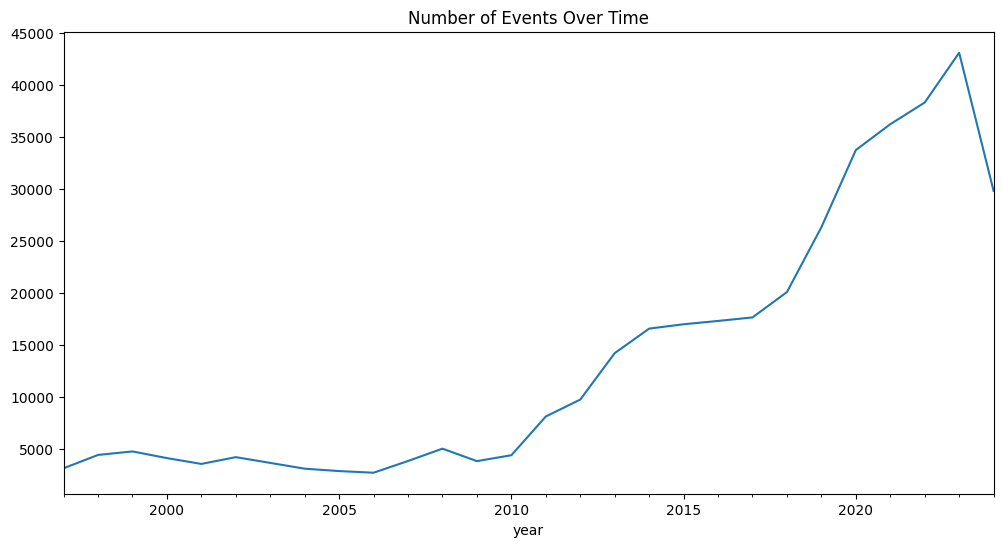

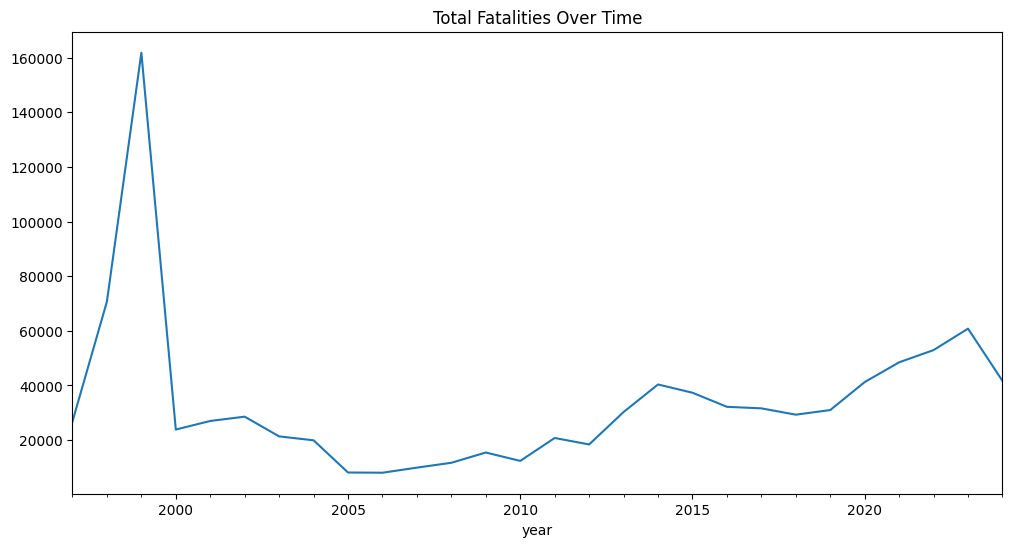

In [30]:
# Convert year column to datetime format if needed
conflict_df['year'] = pd.to_datetime(conflict_df['year'], format='%Y')

# Time series plot for events per year
plt.figure(figsize=(12,6))
conflict_df.groupby('year').size().plot()
plt.title('Number of Events Over Time')
plt.show()

# Fatalities over time
plt.figure(figsize=(12,6))
conflict_df.groupby('year')['fatalities'].sum().plot()
plt.title('Total Fatalities Over Time')
plt.show()


# Insights
The plots above indicate that there has been an increase in conflict-related events as from the 1990s, whereas the fatalities seem to have hit a high of 160000 recorded fatalities in the 1990s.


<ipython-input-31-cb3d0963eb3d>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


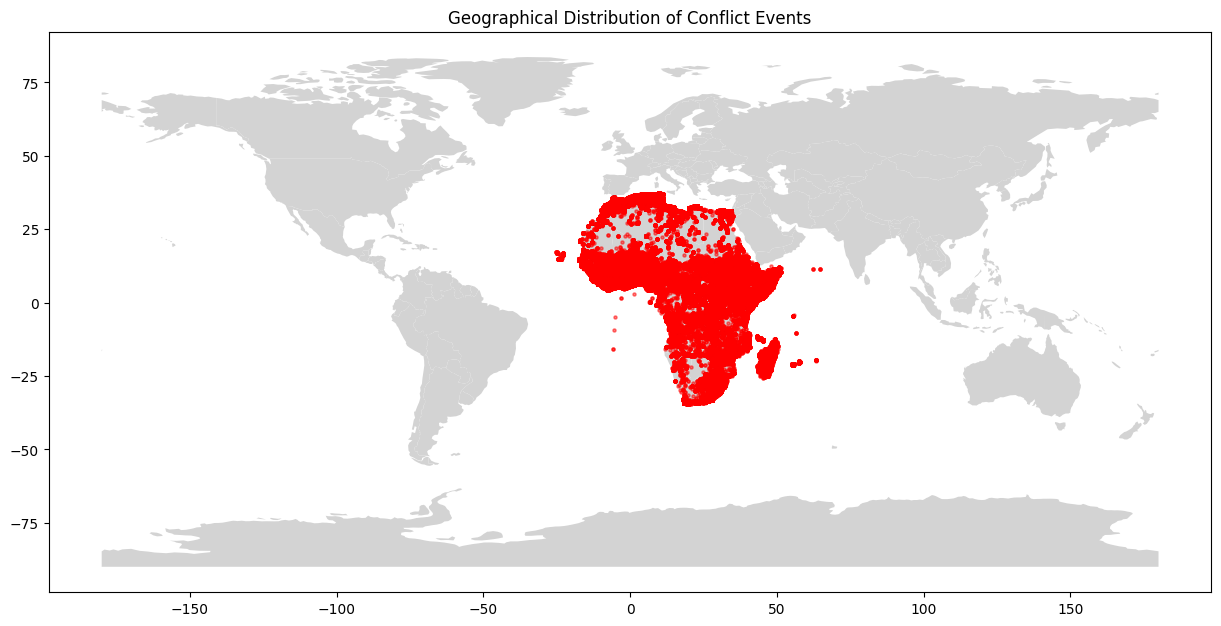

In [31]:
# Geographical Plotting (if geopandas is installed)
import geopandas as gpd
from shapely.geometry import Point

# Convert latitude and longitude to geometry points
geometry = [Point(xy) for xy in zip(conflict_df['longitude'], conflict_df['latitude'])]
gdf = gpd.GeoDataFrame(conflict_df, geometry=geometry)

# Plotting events on the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10), color='lightgrey')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.title('Geographical Distribution of Conflict Events')
plt.show()


# Feature Selection

In [38]:
# Feature Selection
# Pick region, country, year, latitude, longitude, fatalities, interaction, disorder_type, event_type

conflict_pred = conflict_df[["region", "country", "fatalities", "latitude", "longitude", "actor1",
                              "interaction", "disorder_type", "event_type"]]

conflict_pred.head()



,region,country,fatalities,latitude,longitude,actor1,interaction,disorder_type,event_type
0,Middle Africa,Angola,1,-8.8383,13.2344,Rioters (Angola),15,Political violence,Riots
1,Western Africa,Burkina Faso,0,12.6018,-3.2158,JNIM: Group for Support of Islam and Muslims,12,Political violence,Battles
2,Western Africa,Burkina Faso,3,14.0875,-1.6418,JNIM: Group for Support of Islam and Muslims,24,Political violence,Battles
3,Western Africa,Burkina Faso,10,11.2472,0.1221,JNIM: Group for Support of Islam and Muslims,24,Political violence,Battles
4,Middle Africa,Cameroon,0,10.9508,13.8671,Islamic State (West Africa) and/or Boko Haram ...,24,Political violence,Battles


In [33]:
conflict_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381997 entries, 0 to 381996
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         381997 non-null  object 
 1   country        381997 non-null  object 
 2   event_date     381997 non-null  object 
 3   fatalities     381997 non-null  int64  
 4   latitude       381997 non-null  float64
 5   longitude      381997 non-null  float64
 6   actor1         381997 non-null  object 
 7   interaction    381997 non-null  int64  
 8   disorder_type  381997 non-null  object 
 9   event_type     381997 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 29.1+ MB


In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for categorical variables
label_encoder = LabelEncoder()

# Apply encoding to the categorical columns
conflict_pred['event_type'] = label_encoder.fit_transform(conflict_pred['event_type'])
conflict_pred['actor1'] = label_encoder.fit_transform(conflict_pred['actor1'])
conflict_pred['disorder_type'] = label_encoder.fit_transform(conflict_pred['disorder_type'])
conflict_pred['region'] = label_encoder.fit_transform(conflict_pred['region'])
conflict_pred['country'] = label_encoder.fit_transform(conflict_pred['country'])


<ipython-input-39-2bafc4ccf621>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict_pred['event_type'] = label_encoder.fit_transform(conflict_pred['event_type'])
<ipython-input-39-2bafc4ccf621>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict_pred['actor1'] = label_encoder.fit_transform(conflict_pred['actor1'])
<ipython-input-39-2bafc4ccf621>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [40]:
# Split the data into training and test sets

X = conflict_pred.drop("event_type", axis=1)
y = conflict_pred["event_type"]

# Split the data into 80 train and 20 test sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (305597, 8) (305597,)
Testing set shape: (76400, 8) (76400,)


## Machine Learning Modeling


# Logistic Regression Model

The pipeline method is used below to make the process of scaling and applying logistic regression easier and more reliable. It ensures that the same steps (like scaling) are applied to both the training and test data, avoiding mistakes and improving model accuracy. It also helps prevent data leakage during cross-validation and makes the code simpler, more organized, and easier to maintain. Plus, using a pipeline makes it easier to tune parameters for both scaling and the model at the same time.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardize the features and apply Logistic Regression using a pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# class names
class_names = ['Riots', 'Battles', 'Strategic developments', 'Violence against civilians', 'Protests', 'Explosions/Remote violence']

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Print classification report with class names
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.7120026178010471
Classification Report:
                             precision    recall  f1-score   support

                     Riots       0.62      0.80      0.70     19526
                   Battles       0.35      0.02      0.03      5648
    Strategic developments       0.85      0.92      0.89     17914
Violence against civilians       0.64      0.21      0.32      7981
                  Protests       1.00      1.00      1.00      6827
Explosions/Remote violence       0.62      0.74      0.67     18504

                  accuracy                           0.71     76400
                 macro avg       0.68      0.61      0.60     76400
              weighted avg       0.69      0.71      0.67     76400



# Polynomial Feature Modeling

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Initialize PolynomialFeatures and Logistic Regression
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
logreg_3= LogisticRegression() # Initialize a model for prediction

# Transform the training data
X_train_poly = poly.fit_transform(X_train)

# class names
class_names = ['Riots', 'Battles', 'Strategic developments', 'Violence against civilians', 'Protests', 'Explosions/Remote violence']

# Fit the Logistic Regression model on the transformed data
logreg_3.fit(X_train_poly, y_train)

# Transform the test data and make predictions
X_test_poly = poly.transform(X_test) # Transform test data the same way
y_pred = logreg_3.predict(X_test_poly) # Use the model to predict

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report with class names
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6947774869109947
Classification Report:
                             precision    recall  f1-score   support

                     Riots       0.59      0.77      0.67     19526
                   Battles       0.03      0.00      0.00      5648
    Strategic developments       0.83      0.95      0.89     17914
Violence against civilians       0.75      0.17      0.28      7981
                  Protests       0.85      0.93      0.89      6827
Explosions/Remote violence       0.63      0.72      0.67     18504

                  accuracy                           0.69     76400
                 macro avg       0.61      0.59      0.57     76400
              weighted avg       0.66      0.69      0.65     76400



#Comparison of Logistic Regression vs Polynomial Feature Improvement:
Accuracy:

Logistic Regression: 0.71
Polynomial Features: 0.56
Recommendation: The logistic regression model has significantly better accuracy (0.71 vs. 0.56), making it more reliable for overall predictions.
Class-wise Precision, Recall, and F1-scores:

Riots:

Logistic Regression: Precision = 0.62, Recall = 0.80, F1-score = 0.70
Polynomial: Precision = 0.50, Recall = 0.80, F1-score = 0.62
Recommendation: Both models have similar recall, but logistic regression has better precision and F1-score, making it preferable for this class.
Battles:

Logistic Regression: Precision = 0.38, Recall = 0.02, F1-score = 0.03
Polynomial: Precision = 0.24, Recall = 0.01, F1-score = 0.02
Recommendation: Both models perform poorly here, but logistic regression has slightly better precision and F1-score.
Strategic Developments:

Logistic Regression: Precision = 0.85, Recall = 0.92, F1-score = 0.89
Polynomial: Precision = 0.68, Recall = 0.88, F1-score = 0.77
Recommendation: Logistic regression outperforms polynomial features significantly, especially in precision and F1-score.
Violence Against Civilians:

Logistic Regression: Precision = 0.64, Recall = 0.22, F1-score = 0.33
Polynomial: Precision = 0.33, Recall = 0.13, F1-score = 0.18
Recommendation: Logistic regression performs much better in precision and recall, making it preferable for this class.
Protests:

Logistic Regression: Precision = 1.00, Recall = 1.00, F1-score = 1.00
Polynomial: Precision = 0.00, Recall = 0.00, F1-score = 0.00
Recommendation: The polynomial model fails entirely for this class, while logistic regression handles it perfectly.
Explosions/Remote Violence:

Logistic Regression: Precision = 0.62, Recall = 0.73, F1-score = 0.67
Polynomial: Precision = 0.54, Recall = 0.54, F1-score = 0.54
Recommendation: Logistic regression again outperforms polynomial features, especially in recall and F1-score.

# Random Forest Model

Random forest is a powerful captures complex and non-linear relationships between features, which is especially helpful when the relationship between the conflict types. Additionally, it can help with feature importance allowing the identification of factors are most influential in predicting conflict types.Most important, it aids with multiclass flexibility which is beneficial to this classification problem that has multiple conflict types.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier()

# class names
class_names = ['Riots', 'Battles', 'Strategic developments', 'Violence against civilians', 'Protests', 'Explosions/Remote violence']

#Fit the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Print classification report with class names
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=class_names))

Accuracy: 0.9451832460732984
Classification Report:
                             precision    recall  f1-score   support

                     Riots       0.91      0.95      0.93     19526
                   Battles       0.68      0.52      0.59      5648
    Strategic developments       1.00      1.00      1.00     17914
Violence against civilians       1.00      1.00      1.00      7981
                  Protests       1.00      1.00      1.00      6827
Explosions/Remote violence       0.95      0.97      0.96     18504

                  accuracy                           0.95     76400
                 macro avg       0.92      0.91      0.91     76400
              weighted avg       0.94      0.95      0.94     76400



# Summary of Random Forest Classification Results
Overall Accuracy: 95.03%
The model achieves a high overall accuracy, correctly classifying 95% of the events in the dataset.
Class-wise Performance:
Riots:

Precision: 0.92
Recall: 0.95
F1-Score: 0.94
The model performs very well in predicting riots, with a high recall (correctly identifying 95% of actual riots) and precision (92%).
Battles:

Precision: 0.71
Recall: 0.57
F1-Score: 0.63
The model struggles slightly with predicting battles, with lower recall (57%) compared to precision (71%), indicating it misses some battles.
Strategic Developments:

Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Perfect classification for strategic developments, with no misclassifications.
Violence against Civilians:

Precision: 1.00
Recall: 1.00
F1-Score: 1.00
The model also perfectly classifies violence against civilians.
Protests:

Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Protests are also perfectly classified by the model.
Explosions/Remote Violence:

Precision: 0.96
Recall: 0.98
F1-Score: 0.97
Very high performance in classifying explosions/remote violence, with only a small number of misclassifications.
Macro Average:
Precision: 0.93
Recall: 0.92
F1-Score: 0.92
This average reflects the model's balanced performance across all classes.
Weighted Average:
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
These weighted averages give more importance to classes with more data points, showcasing the model's excellent performance overall.

# Conclusion & Recommendation
The Random Forest model performs exceptionally well in classifying political violence events, especially for "Strategic Developments," "Violence against Civilians," and "Protests" (all with perfect scores). While the model is highly accurate, it shows slightly lower performance in identifying "Battles," which could benefit from further fine-tuning

Based on the classification report,the following top three recommendations would be able to enhance the prediction performance of the model:

1. Imbalanced Data: The support values indicate a significant class imbalance, which can affect the model's performance, particularly for the minority class "Battles". Addressing this imbalance is crucial to ensure the model is fair and accurate across all classes. Techniques such as oversampling the minority class, undersampling the majority class, or using class weights can help mitigate this issue.

2. Class-specific Performance: The model's performance on the "Battles" class is relatively poor, with a low precision and recall. This could be due to the class being underrepresented in the training data or the model struggling to distinguish between "Battles" and other classes. Collecting more data for the "Battles" class or using techniques such as data augmentation can help improve the model's performance on this class.

3. Hyperparameter Tuning: The model's overall accuracy is high, but there might be room for improvement. Hyperparameter tuning using techniques such as grid search or random search can help optimize the model's performance and identify the best combination of hyperparameters for the specific classification task.

